In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import optuna
import lightgbm as lgb

from src.eda.plot_distribution import plot_distribution, compare_dataframes
from src.preprocess import bin_column_by_custom_quantiles, bin_column_by_quantile, convert_edu, convert_marital_status, fill_missing_categorical, label_encode_datasets, remove_spaces
from src.model.lgbm import LGBM

/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [3]:
df1 = pd.read_excel('../dataset/train.xlsx')
df2 = pd.read_excel('../dataset/test.xlsx')

In [4]:
train = df1.copy()
test = df2.copy()

In [5]:
train.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours,high_income
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,no
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,no
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,no
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,no
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,no


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               32561 non-null  int64 
 1   age              32561 non-null  int64 
 2   sector           32561 non-null  object
 3   edu              32561 non-null  object
 4   marital_status   32561 non-null  object
 5   field            32561 non-null  object
 6   family_rel       32561 non-null  object
 7   gender           32561 non-null  object
 8   investment_gain  32561 non-null  int64 
 9   investment_loss  32561 non-null  int64 
 10  working_hours    32561 non-null  int64 
 11  high_income      32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               16281 non-null  int64 
 1   age              16281 non-null  int64 
 2   sector           16281 non-null  object
 3   edu              16281 non-null  object
 4   marital_status   16281 non-null  object
 5   field            16281 non-null  object
 6   family_rel       16281 non-null  object
 7   gender           16281 non-null  object
 8   investment_gain  16281 non-null  int64 
 9   investment_loss  16281 non-null  int64 
 10  working_hours    16281 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.4+ MB


# EDA

### Compare distribution of train and test set

edu is categorical


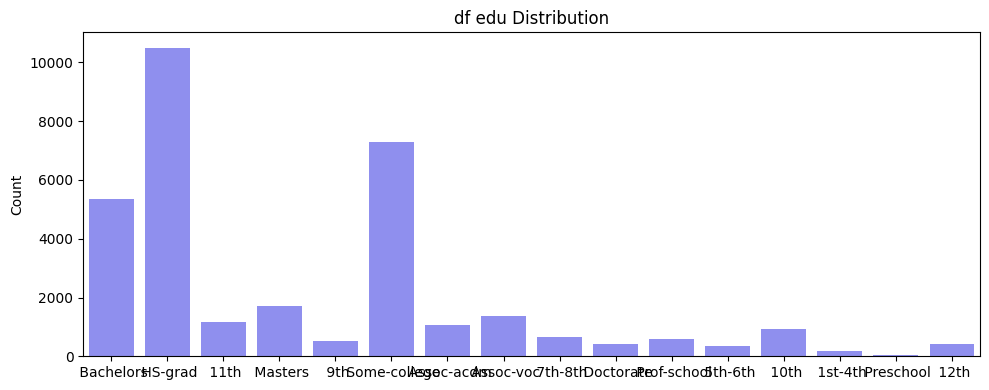

In [8]:
plot_distribution(train, 'edu')

edu is categorical


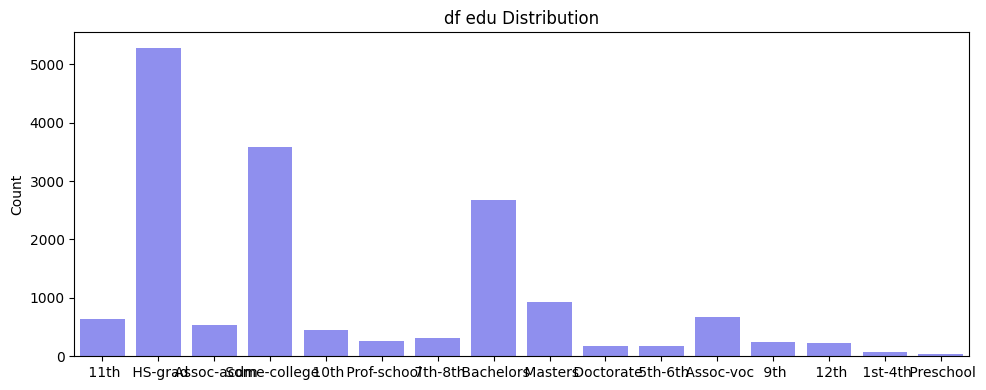

In [9]:
plot_distribution(test, 'edu')

# Pre-processing

In [10]:
from src.preprocess import preprocess_pipeline

train = preprocess_pipeline(train)

# Model

### Hyperparameter tuning

In [11]:
from src.model.lgbm import LGBM

[I 2024-06-26 18:55:59,376] A new study created in memory with name: no-name-2dd9e9dd-6259-406e-9dde-48e0ba096746
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call th

TRAIN: Trial 0 - Accuracy: 0.7591904427329972, F1: 0.0, Precision: 0.0, Recall: 0.0, AUC: 0.5
VALID: Trial 0 - Accuracy: 0.7591904454179904, F1: 0.0, Precision: 0.0, Recall: 0.0, AUC: 0.5


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found 

TRAIN: Trial 1 - Accuracy: 0.7804121338300913, F1: 0.2668026980011183, Precision: 0.6807870038328063, Recall: 0.16592257838094587, AUC: 0.8085137353425293
VALID: Trial 1 - Accuracy: 0.7804118987502221, F1: 0.26658402438766676, Precision: 0.68055072087419, Recall: 0.16592054603868314, AUC: 0.8083029224359561


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 2 - Accuracy: 0.8316160363836138, F1: 0.5980339957964933, Precision: 0.70340953534335, Recall: 0.5203102887496462, AUC: 0.8841468394871151
VALID: Trial 2 - Accuracy: 0.8298885266699638, F1: 0.5939854155161088, Precision: 0.6989595348620361, Recall: 0.5167696667577165, AUC: 0.8824657625930576


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 3 - Accuracy: 0.8252357150477041, F1: 0.5700764005460067, Precision: 0.6993372507774438, Recall: 0.48118860349017656, AUC: 0.8718549927368331
VALID: Trial 3 - Accuracy: 0.8252510382749904, F1: 0.5707526800887027, Precision: 0.6988317525553452, Recall: 0.48246543359217486, AUC: 0.870877369464736


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 4 - Accuracy: 0.8208362750110993, F1: 0.5651971445116903, Precision: 0.6799836800378181, Recall: 0.4835799614561272, AUC: 0.8578695953852857
VALID: Trial 4 - Accuracy: 0.820306485875348, F1: 0.5652194622620634, Precision: 0.6774372013760364, Recall: 0.48501588493906167, AUC: 0.8572550231194102
Number of finished trials: 5
Best trial:
  Value: 0.5939854155161088
  Params: 
    lambda_l1: 3.5555844308384757e-05
    lambda_l2: 9.029288098534694e-07
    num_leaves: 370
    feature_fraction: 1.0
    bagging_fraction: 0.4
    bagging_freq: 5
    min_child_samples: 44
    n_estimators: 10000
    learning_rate: 0.20907068045533814
    max_depth: 9
    min_data_in_leaf: 1300
    max_bin: 248
    min_gain_to_split: 5.25784621323699


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


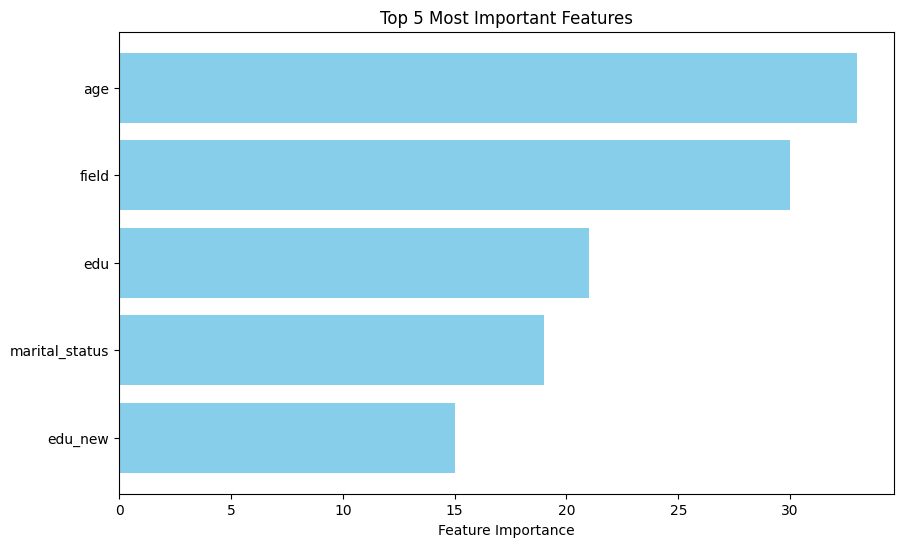

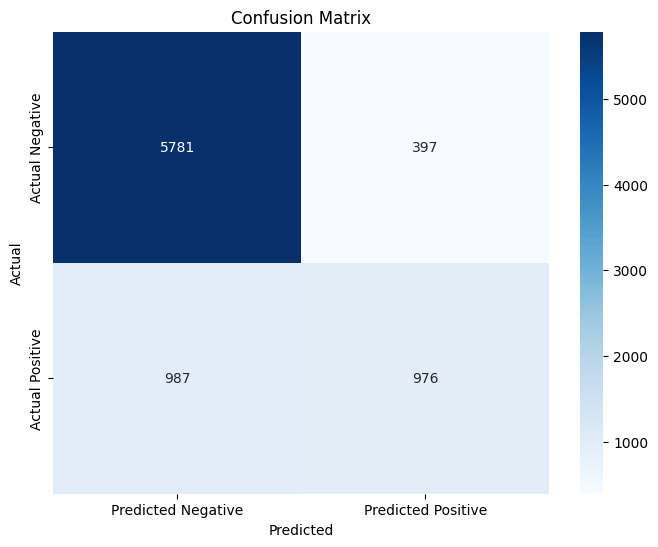

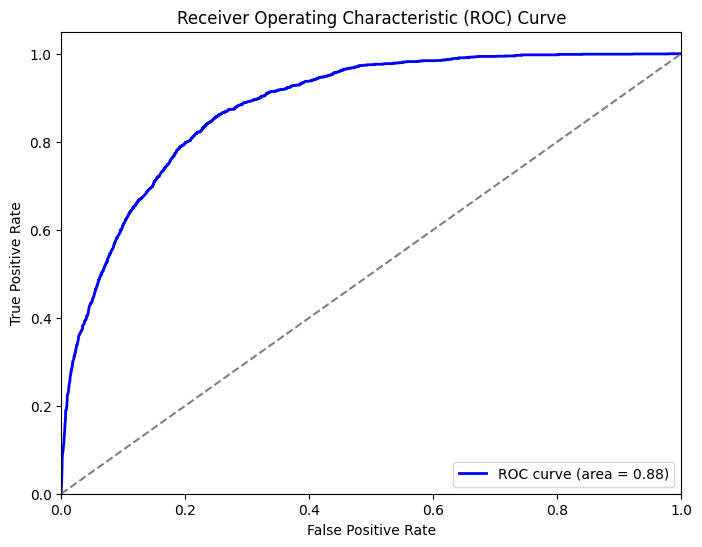

In [12]:
model = LGBM(train)
model.finetune(n_trials=5)

# Infer

In [13]:
import joblib
import pandas as pd

model = joblib.load('../weights/best_lgbm2.pkl')

test.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40
4,32566,18,?,Some-college,Never-married,?,Own-child,Female,0,0,30
